In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import polars as pl


In [2]:
#NPOB = 20
#NGEN = 250
#Pc = 0.8
#Pm = 0.2
#C = 0.4
NRES = 10
NSAMPLE = 25
random_vector = None

In [3]:
# reaf the data from the excel file
data = pd.read_excel('Datos TablaInversiones.xlsx')
data = data.dropna()
data = data.reset_index(drop=True)
# rename columns
data.columns = ["Empresa","Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
data

,Empresa,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,IBM,-0.012546,0.045071,0.023199,0.009866,-0.034398,-0.034401,-0.044192,0.036618,0.010112,0.020807,-0.047942,0.046991
1,Nvidia,0.033244,-0.028766,-0.031818,-0.03166,-0.019576,0.002476,-0.006805,-0.020877,0.011185,-0.036051,-0.020786,-0.013364
2,Kellogs,-0.004393,0.028518,-0.030033,0.001423,0.009241,-0.045355,0.010754,-0.032948,-0.043495,0.044889,0.046563,0.03084
3,Microsoft,-0.019539,-0.040233,0.018423,-0.005985,-0.037796,-0.000482,-0.046561,0.040932,-0.024122,0.016252,-0.018829,0.002007
4,BP,0.004671,-0.031515,0.046958,0.027513,0.04395,0.039483,0.00979,0.042187,-0.041151,-0.030402,-0.045477,-0.017467
5,UPS,-0.011132,-0.022865,0.032874,-0.014325,-0.021907,0.00427,-0.035908,0.03022,-0.042545,0.048689,0.027224,-0.030128
6,Amazon,-0.049448,0.031546,0.020686,0.022901,0.027127,-0.042596,-0.014153,-0.038413,0.03631,0.01233,-0.01691,-0.043644
7,Intel,-0.018902,-0.017482,0.022961,0.013756,0.038721,-0.002779,-0.038041,0.021324,0.026079,0.006128,0.027097,-0.00062
8,Ford,0.002273,-0.007246,-0.047458,-0.039211,-0.046857,0.013641,-0.018564,0.000857,0.040757,-0.025071,-0.008962,0.025555
9,Exxon,-0.02712,-0.042302,-0.021025,-0.033878,0.04297,0.030812,0.01334,0.037146,0.030367,-0.031343,0.039256,0.003934


In [4]:
import plotly as py
import plotly.io as pio
import plotly.express as px

# plot every company performance in the year show them all in a plot
x = data.columns[1:]
y = data.iloc[0,1:]
#fig = px.line(x=x, y=y, title='Performance de las empresas del dataset')
fig = py.graph_objs.Figure()
# add title
fig.update_layout(title='Performance de las empresas del dataset')
for i in range(1, data.shape[0]):
    y = data.iloc[i,1:]
    fig.add_scatter(x=x, y=y, mode='lines', name=data.iloc[i,0])
fig.show()







In [5]:
ri_cache = {}

def ri(copañia):
    if copañia not in ri_cache:
        ri_cache[copañia] = data.loc[data["Empresa"] == copañia].iloc[0, 1:].sum()/12
    return ri_cache[copañia]
    #add the row of the company and divide by 12
    #return (data.loc[data["Empresa"] == copañia].iloc[0, 1:].sum())/12

ri("IBM")

0.0015987499999999993

In [6]:
def cromosoma():
    # generate a vector of 20 random numbers between 0 and 1 that sum 1
    np.random.seed()
    c = np.random.rand(20)
    c = c/sum(c)
    return c

In [7]:
def calcularRc(cromosoma):
    rc = 0
    for i in range(20):
        rc += cromosoma[i]*ri(data.iloc[i]["Empresa"])
    return rc

In [8]:
def calcularOi(i):
    resultado = 0
    for m in range(12):
        resultado += np.square(data.iloc[i][m+1] - ri(data.iloc[i]["Empresa"]))
    return np.sqrt(resultado/11)

calcularOi(1)

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.02055088711422984

In [9]:
def calcularOc(cromosoma):
    resultado = 0
    for i in range(20):
        for j in range(20):
            resultado += cromosoma[i]*cromosoma[j]*calcularOi(i)*calcularOi(j)
    return np.sqrt(0.25 * resultado)

In [10]:
def ratioSharpe(cromosoma):
    rc = calcularRc(cromosoma)
    desv = calcularOc(cromosoma)
    return (rc - 0.003757)/desv

In [11]:
def ruleta(fitness_gen, fitness_total, Pm):
  """
  Función que decide si mutar un gen usando la ruleta.

  Args:
    fitness_gen: Fitness del gen a evaluar.
    fitness_total: Fitness total del cromosoma.
    Pm: Probabilidad de mutación individual.

  Returns:
    True si el gen debe mutarse, False en caso contrario.
  """
  fitness_relativo = fitness_gen / fitness_total
  r = np.random.random()

  # Aplicar ruleta
  if r < fitness_relativo * Pm:
    return True
  else:
    return False

In [12]:
def ruletaEncruzamiento(fitness_gen, fitness_total, Pc):
  """
  Función que decide si cruzar un gen usando la ruleta.

  Args:
    fitness_gen: Fitness del gen a evaluar.
    fitness_total: Fitness total del cromosoma.
    Pc: Probabilidad de cruzamiento.

  Returns:
    True si el gen debe cruzarse, False en caso contrario.
  """
  fitness_relativo = fitness_gen / fitness_total
  r = np.random.random()

  # Aplicar ruleta
  if r < fitness_relativo * Pc:
    return True
  else:
    return False

In [13]:
def mutacion(cromosomaProcesado, Pm):
    for gen in range(len(cromosomaProcesado)):
        # Cambiar a el metodo de la ruleta
        #if ruleta(gen, fitness, Pm):
        if np.random.rand() < Pm:
            # generate a random number between 0 and 1
            nuevoGen = (np.random.rand() - 0.5) * C
            if nuevoGen < 0:
                nuevoGen = 0
            cromosomaProcesado[gen] = nuevoGen
            del nuevoGen


    return (cromosomaProcesado/sum(cromosomaProcesado))

In [14]:
def entrecruzamiento(cromosoma1, cromosoma2, Pc):
    # generate a random number between 0 and 1
    #if metodoRuleta(cromosoma1, Pc):
    r = np.random.random()
    if r < Pc:
        # generate a random number between 0 and 20
        punto = np.random.randint(20)
        # generate two new chromosomes
        cromosoma1 = np.concatenate((cromosoma1[:punto], cromosoma2[punto:]))
        cromosoma2 = np.concatenate((cromosoma2[:punto], cromosoma1[punto:]))

        # if there is a negative number, change it to 0
        cromosoma1[cromosoma1 < 0] = 0
        cromosoma2[cromosoma2 < 0] = 0
        cromosoma1 = cromosoma1/sum(cromosoma1)
        cromosoma2 = cromosoma2/sum(cromosoma2)
    return cromosoma1, cromosoma2

In [15]:
def seleccionarHijos(df, fraccion, Pc, Pm):
    cromosomas = []
    fitness = []

    for _ in range(int(fraccion/2)):
        cromosoma1 = None
        cromosoma2 = None
        r = np.random.random()
        for i in range(df.shape[0]):
            if r < df["Probabilidad Acumulada"][i]:
                cromosoma1 = df["Cromosoma"][i]
                break
        r = np.random.random()
        for i in range(df.shape[0]):
            if r < df["Probabilidad Acumulada"][i]:
                cromosoma2 = df["Cromosoma"][i]
                break

        # aplicar entrecruzamiento
        cromosoma1, cromosoma2 = entrecruzamiento(cromosoma1, cromosoma2, Pc)

        cromosoma1 = mutacion(cromosoma1, Pm)
        cromosoma2 = mutacion(cromosoma2, Pm)
        finess1 = ratioSharpe(cromosoma1)
        finess2 = ratioSharpe(cromosoma2)
        cromosomas.append(cromosoma1)
        cromosomas.append(cromosoma2)
        fitness.append(finess1)
        fitness.append(finess2)
        del cromosoma1, cromosoma2, finess1, finess2

    return cromosomas, fitness

Empezar con el entrenamiento

In [17]:
def cromosomaConsensoFunc(df1):
    cromosomal = []
    for i in range(20):
        columna = []
        for j in range(20):
            columna.append(df1["Cromosoma"][j][i])
            # calculate the median of the column
        median = np.median(columna)
        cromosomal.append(median)
        del columna, median
    return cromosomal




In [18]:
def entrenamiento(NPOB, NGEN, Pc, Pm, C):
  poblacion = []
  for i in range(NPOB):
      poblacion.append(cromosoma())

  # calculate the fitness of the population
  fitness = []
  for i in range(NPOB):
      fitness.append(ratioSharpe(poblacion[i]))

  # save to pandas dataframe
  df = pd.DataFrame({"Cromosoma": poblacion, "Fitness": fitness})
  df = df.sort_values(by="Fitness", ascending=False, ignore_index=True) 


  print("Comenzando algoritmo genético con los parametros:")
  print(f"NPOB: {NPOB}")
  print(f"NGEN: {NGEN}")
  print(f"Pc: {Pc}")
  print(f"Pm: {Pm}")
  print(f"C: {C}")


  BESTc = None
  BESTf = None
  BESTPorcentaje = None
  CONSf = None
  cromosomaConsenso = None
  historicoBestFitness = []



  for v in range(NGEN):
      nextGen = df.head(int(NPOB*0.2)).copy()
      df = df[int(NPOB*0.2):]
      df = df.reset_index(drop=True)


      probabilidadSeleccion = []
      for i in range(nextGen.shape[0]):
          probabilidadSeleccion.append(nextGen["Fitness"][i]/sum(nextGen["Fitness"]))
      probabilidadAcumulada = []
      suma = 0
      for i in range(nextGen.shape[0]):
          suma += probabilidadSeleccion[i]
          probabilidadAcumulada.append(suma)

      #nextGen = nextGen.with_columns([pl.Series("Probabilidad", probabilidadSeleccion), pl.Series("Probabilidad Acumulada", probabilidadAcumulada)])
      nextGen["Probabilidad"] = probabilidadSeleccion
      nextGen["Probabilidad Acumulada"] = probabilidadAcumulada
      del probabilidadAcumulada, probabilidadSeleccion

      probabilidadSeleccion = []
      for i in range(df.shape[0]):
          probabilidadSeleccion.append(df["Fitness"][i]/sum(df["Fitness"]))
      probabilidadAcumulada = []
      suma = 0
      for i in range(df.shape[0]):
          suma += probabilidadSeleccion[i]
          probabilidadAcumulada.append(suma)

      df["Probabilidad"] = probabilidadSeleccion
      df["Probabilidad Acumulada"] = probabilidadAcumulada
      del probabilidadAcumulada, probabilidadSeleccion


      hijosNextGen, fitnessNextGen = seleccionarHijos(nextGen, NPOB/2, Pc, Pm)
      hijosDf, fitnessDf = seleccionarHijos(df, NPOB/3, Pc, Pm)

      hijos = hijosNextGen + hijosDf
      fitness = fitnessNextGen + fitnessDf

      nextGen.drop(columns=["Probabilidad", "Probabilidad Acumulada"], inplace=True)


      newDf = pd.DataFrame({"Cromosoma": hijos, "Fitness": fitness})
      del df

      df = pd.concat([nextGen, newDf], ignore_index=True)

      del hijos, fitness, hijosNextGen, fitnessNextGen, hijosDf, fitnessDf
      del nextGen, newDf


      df = df.sort_values(by="Fitness", ascending=False, ignore_index=True)
      if BESTf is None or BESTf < df["Fitness"][0]:
          BESTf = df["Fitness"][0]
          BESTc = df["Cromosoma"][0]

      historicoBestFitness.append(BESTf)

      # count how many times the best chromosome appears in the population
      count = 0
      for i in range(NPOB):
          if np.array_equal(df["Cromosoma"][i], BESTc):
              count += 1
      BESTPorcentaje = count/NPOB * 100
      del count

      cromosomaConsenso = cromosomaConsensoFunc(df)

      if v % NRES == 0:
          print(f"Generacion {v} completada")
          print("Mejor cromosoma:", BESTc, ", Mejor fitness:", BESTf)
          print("Porcentaje de aparición del mejor cromosoma:", BESTPorcentaje)
          print("Cromosoma consenso:", cromosomaConsenso)
          print("\n"*2)
          #df.write_avro(f"generacion_{i}.avro")
      if v % NSAMPLE == 0:
          print(f"Generacion {v} completada")
          print("Mejor cromosoma:", BESTc, ", Mejor fitness:", BESTf)
          print("Porcentaje de aparición del mejor cromosoma:", BESTPorcentaje)
          print("Cromosoma consenso:", cromosomaConsenso)
          print("Muestreo del 20% de la población")
          print(df.head(int(NPOB*0.2)))
          print("\n"*2)


  print(f"Generacion {v} completada")
  print("Mejor cromosoma:", BESTc, ", Mejor fitness:", BESTf)
  print("Porcentaje de aparición del mejor cromosoma:", BESTPorcentaje)
  print("Cromosoma consenso:", CONSf)
  print("Muestreo del 20% de la población")
  print(df.head(int(NPOB*0.2)))

  return historicoBestFitness, BESTc, BESTf



In [19]:
arrayNPOB = [100, 150]
arrayNGEN = [50 ,100]
arrayPc = [0.4, 0.6]
arrayPm = [0.5, 0.6]
arrayC = [0.2, 0.6]



for NPOB in arrayNPOB:
    for NGEN in arrayNGEN:
        for Pc in arrayC:
            for Pm in arrayPm:
                for C in arrayC:
                  historicoBestFitness, BESTc, BESTf = entrenamiento(NPOB, NGEN, Pc, Pm, C)

                  plt.plot(historicoBestFitness)
                  plt.title("Mejor fitness por generación")
                  plt.xlabel("Generación")
                  plt.ylabel("Fitness")
                  plt.show()

                  print("Mejor cromosoma fitness:", BESTf)
                  #get the position of the genes that are not 0
                  genes = []
                  for i in range(20):
                      if BESTc[i] != 0:
                          print(data.iloc[i]["Empresa"], BESTc[i])




/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Comenzando algoritmo genético con los parametros:
NPOB: 100
NGEN: 50
Pc: 0.2
Pm: 0.5
C: 0.2


/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Generacion 0 completada
Mejor cromosoma: [0.10352257 0.         0.         0.         0.1184331  0.05187738
 0.         0.05702988 0.         0.         0.         0.07473062
 0.09229384 0.03540135 0.04284265 0.07275556 0.14224636 0.
 0.19656333 0.01230334] , Mejor fitness: -0.13641310268698445
Porcentaje de aparición del mejor cromosoma: 0.01
Cromosoma consenso: [0.07448453122578089, 0.0009804354575713484, 0.019684026814713956, 0.0040903022711759815, 0.061525029885553945, 0.020932505481329817, 0.026679096498611617, 0.06968926549082952, 0.013986298756156215, 0.07915569851605715, 0.004771548470766649, 0.05532229477043053, 0.0, 0.023768782079100277, 0.0, 0.05669060797033152, 0.09979276945436687, 0.0, 0.09023516743303234, 0.0420114700031387]



Generacion 0 completada
Mejor cromosoma: [0.10352257 0.         0.         0.         0.1184331  0.05187738
 0.         0.05702988 0.         0.         0.         0.07473062
 0.09229384 0.03540135 0.04284265 0.07275556 0.14224636 0.
 0.19656333 0.

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 10 completada
Mejor cromosoma: [0.03919776 0.         0.         0.         0.0537578  0.
 0.14799432 0.13201123 0.         0.         0.         0.
 0.         0.         0.         0.         0.47111936 0.
 0.15591953 0.        ] , Mejor fitness: 0.1343107832465413
Porcentaje de aparición del mejor cromosoma: 0.01
Cromosoma consenso: [0.019587560038243176, 0.0, 0.039103278220620846, 0.0, 0.0, 0.0, 0.0005104710962411952, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29804594281611474, 0.0, 0.0198108168132387, 0.019050308539729388]





/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

Generacion 20 completada
Mejor cromosoma: [0.08464577 0.02957968 0.         0.         0.01526009 0.05616404
 0.         0.         0.         0.04995604 0.         0.
 0.         0.04395256 0.08624664 0.         0.08489869 0.
 0.0584661  0.        ] , Mejor fitness: 0.2226176244728208
Porcentaje de aparición del mejor cromosoma: 0.01
Cromosoma consenso: [0.04730237505952027, 0.0, 0.0010142506293815666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0030330367701587035, 0.00499275824988581, 0.0, 0.0028450390353857414, 0.0, 0.0, 0.21091513854199948, 0.0, 0.0, 0.0]





/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_12653/1038542018.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

KeyboardInterrupt: 

In [ ]:
df

NameError: name 'df' is not defined

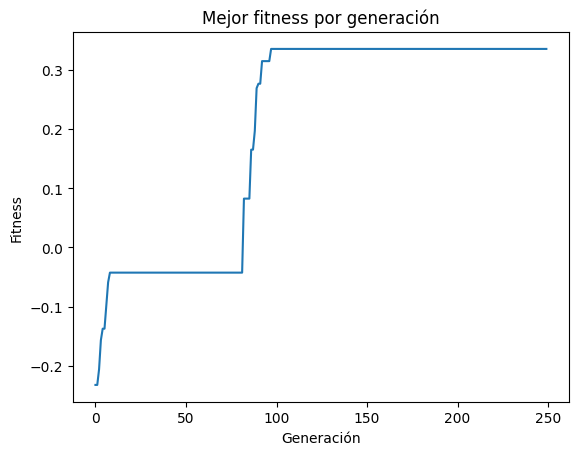

In [ ]:
# graph the best fitness
plt.plot(historicoBestFitness)
plt.title("Mejor fitness por generación")
plt.xlabel("Generación")
plt.ylabel("Fitness")
plt.show()


In [ ]:
# get the position of the genes that are not 0
genes = []
for i in range(20):
    if BESTc[i] != 0:
        print(data.iloc[i]["Empresa"], BESTc[i])

IBM 0.06023513144946083
Nvidia 0.04501632648966117
Kellogs 0.046736322469162955
Microsoft 0.027321132573988872
Amazon 0.002532050546225451
Ford 0.08411822487744952
Exxon 0.19454869289704624
Pfizer 0.037608307023073856
Ikea 0.019690133607887142
Bayer 0.13909683098598108
Samsung 0.0004954564896036296
Telefónica 0.07377874310805525
L'Oréal 0.12719172754653618


In [ ]:
# hash of df
BESTf

0.3358454007619389